In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# load dataset
train_data = np.loadtxt('../HW2_material/MNISTnumImages5000_balanced.txt', dtype=float)
train_labels = np.loadtxt('../HW2_material/MNISTnumLabels5000_balanced.txt', dtype=float)

In [51]:
def create_file(i):
    currentFile = open('../assets/' + str(i) + '.txt', 'w')
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == i]
    data = ""
    for i in range(len(img)):
        for j in range(len(img[i])):
            temp_data = str(img[i][j])
            data += temp_data + "\t"
        data += "\n"
    currentFile.write(data)
    currentFile.close()

def shuffle_lst(num_label):
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == num_label]
    res = list()
    for i in range(400):
        res.append(img[i])
    return res

training_dataset = shuffle_lst(0) + shuffle_lst(1)
random.shuffle(training_dataset)


def make_dataset(num_label): 
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == num_label]
    random.shuffle(img)
    res = list()
    for i in range(400, 500):
        res.append(img[i])
    return res


test_dataset = list()
challenge_dataset = list()


for i in range(10):
    if i == 0 or i == 1:
        test_dataset += make_dataset(i)
    elif i in [n for n in range(2, 10)]:
        challenge_dataset += make_dataset(i)
        
random.shuffle(test_dataset)
random.shuffle(challenge_dataset)

def create_dataset(name, dataset):
    currentFile = open('../assets/' + name + '.txt', 'w')
    data = ""
    for i in range(len(dataset)):
        for j in range(len(dataset[i])):
            temp_data = str(dataset[i][j])
            data += temp_data + "\t"
        data += "\n"
    currentFile.write(data)
    currentFile.close()    

In [52]:
# Create data files
for i in range(10):
    if i == 0 or i == 1 or i == 7 or i == 9:
        create_file(i)
create_dataset('challenge_dataset', challenge_dataset)
create_dataset('test_dataset', test_dataset)
create_dataset('training_dataset', training_dataset)

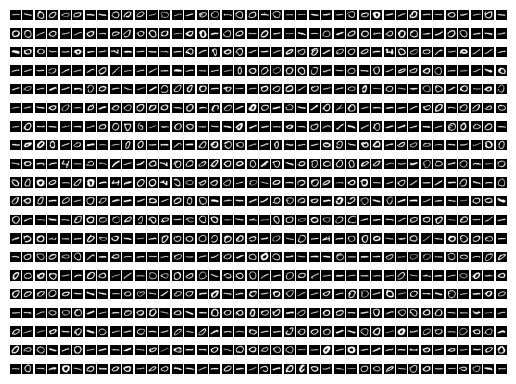

In [53]:
# For testing purpose
file_test = np.loadtxt('../assets/training_dataset.txt', dtype=float)
for i in range(0, 800):
    image = file_test[i].reshape((28, 28))
    plt.subplot(20, 40, i + 1)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
plt.show();